In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore, loguniform, randint
import math

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.impute import SimpleImputer


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



In [6]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [5]:
file_path = r'D:\BANASHREE\KAGGLE DATASETS\Life Expectancy Data.csv'

df = pd.read_csv(file_path)

In [7]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
#checking of duplicate data points
df.duplicated().sum()

0

In [11]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [12]:
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols


In [13]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [16]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [17]:
numeric_columns=df.select_dtypes(include=['int','float']).columns
categorical_columns=df.select_dtypes(include='object').columns

In [21]:
columns_to_impute=df.select_dtypes(include=['int64', 'float64']).columns[df.select_dtypes(include=['int64', 'float64']).isnull().any()]




In [22]:
columns_to_impute

Index(['life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b', 'bmi',
       'polio', 'total_expenditure', 'diphtheria', 'gdp', 'population',
       'thinness_1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [23]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median", fill_value=None)
for column in columns_to_impute:
    df[column] = imputer.fit_transform(df[[column]])

In [24]:
df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

EDA

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'life_expectancy'}>,
        <Axes: title={'center': 'adult_mortality'}>,
        <Axes: title={'center': 'infant_deaths'}>],
       [<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'percentage_expenditure'}>,
        <Axes: title={'center': 'hepatitis_b'}>,
        <Axes: title={'center': 'measles'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'under-five_deaths'}>,
        <Axes: title={'center': 'polio'}>,
        <Axes: title={'center': 'total_expenditure'}>],
       [<Axes: title={'center': 'diphtheria'}>,
        <Axes: title={'center': 'hiv/aids'}>,
        <Axes: title={'center': 'gdp'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'thinness_1-19_years'}>,
        <Axes: title={'center': 'thinness_5-9_years'}>,
        <Axes: title={'center': 'income_composition_of_resources'}>,
        <Axes: title={'center': 'school

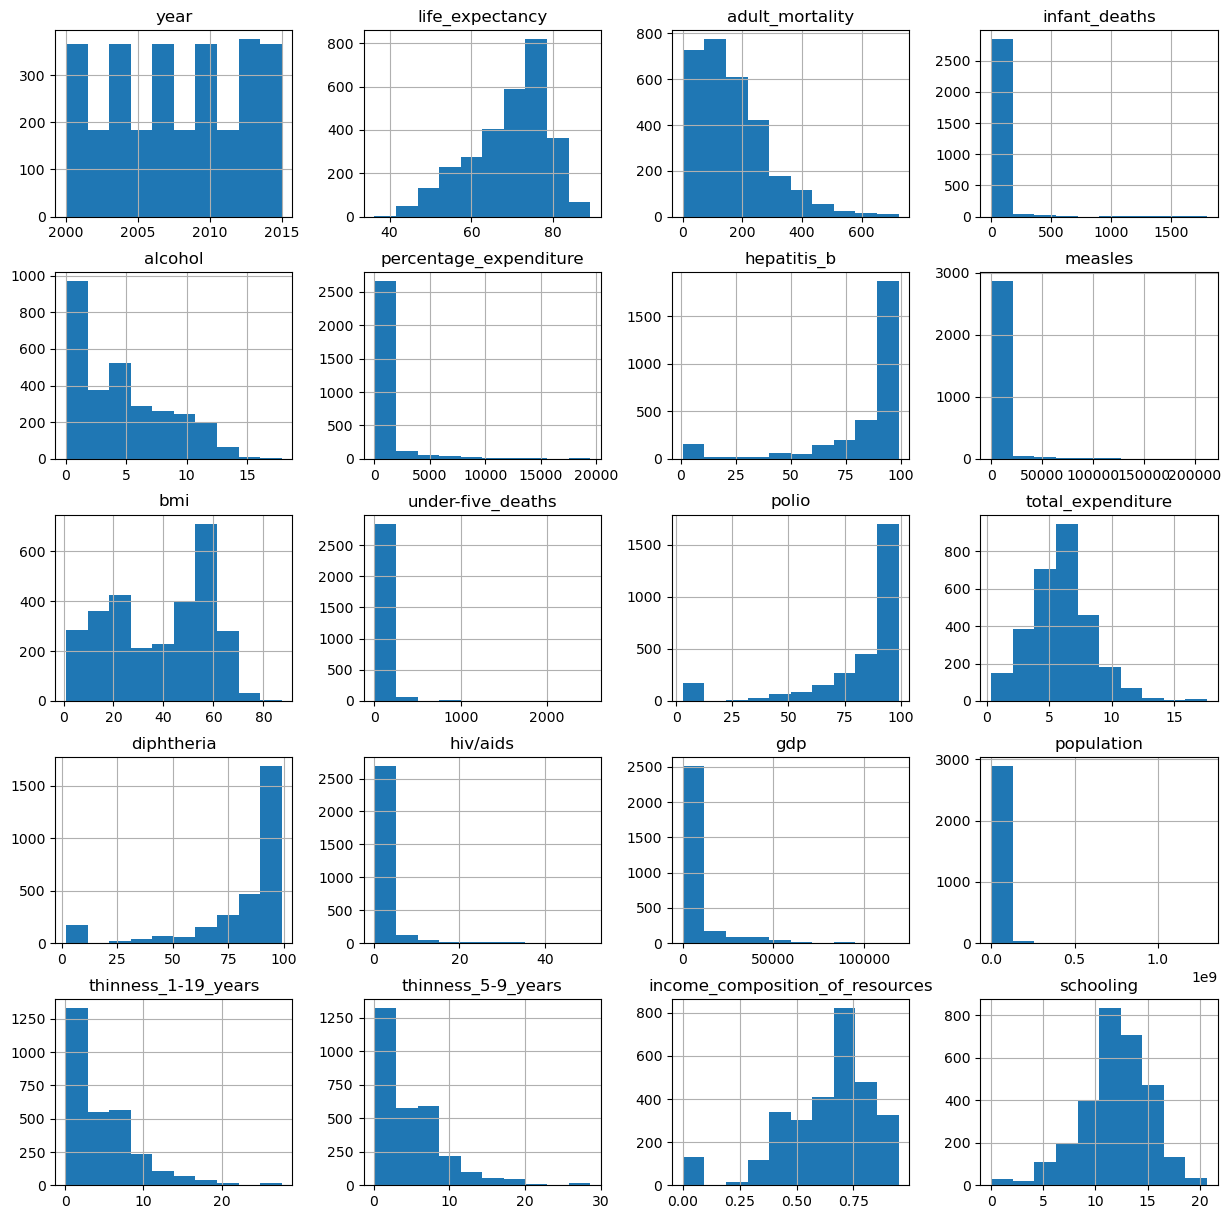

In [25]:
df.hist(figsize=(15,15))

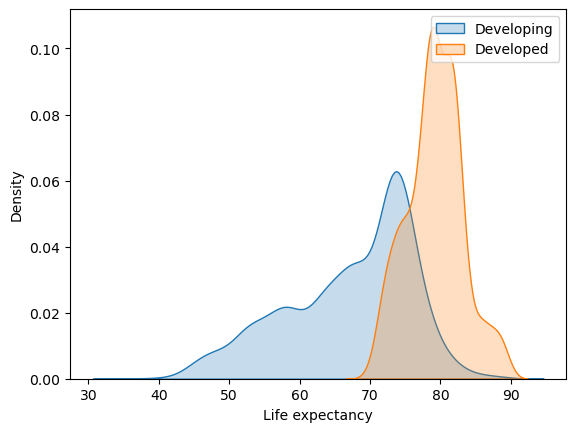

In [26]:
sns.kdeplot(df[df['status'] == 'Developing']['life_expectancy'], label='Developing', fill=True)
sns.kdeplot(df[df['status'] == 'Developed']['life_expectancy'], label='Developed', fill=True)
plt.xlabel('Life expectancy')
plt.ylabel('Density')
plt.legend()
plt.show()


In [27]:
india_data = df[df['country'] == 'India']

This density plot shows that developed countries are stable because the range of the live expectancy age of developed countries is short, also the developing countries may have very different life expenctacy rates.

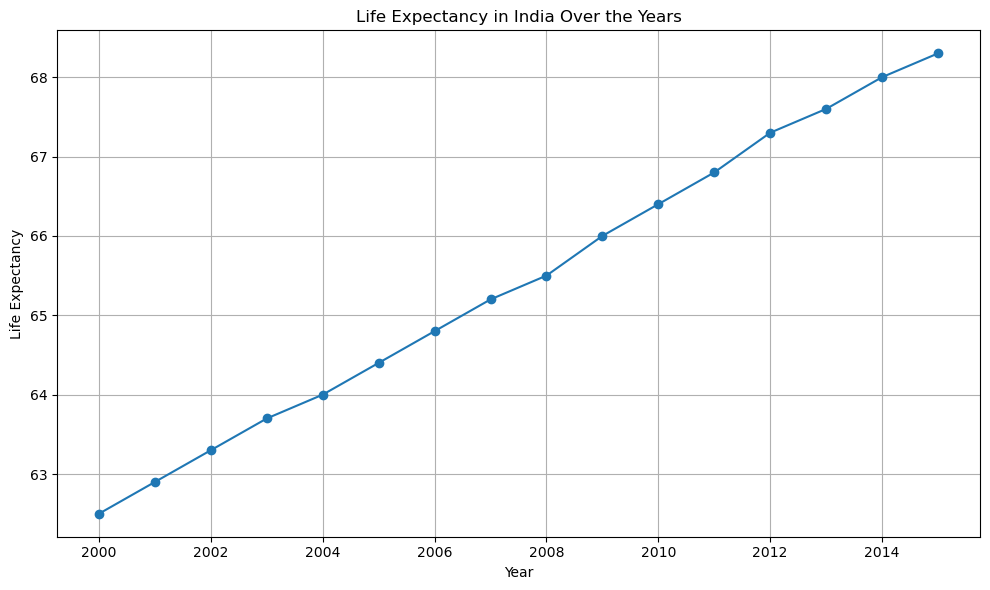

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(india_data['year'], india_data['life_expectancy'], marker='o', linestyle='-')
plt.title('Life Expectancy in India Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.tight_layout()
plt.show()

Here we can see how the life expectancy of our country has increased over the years

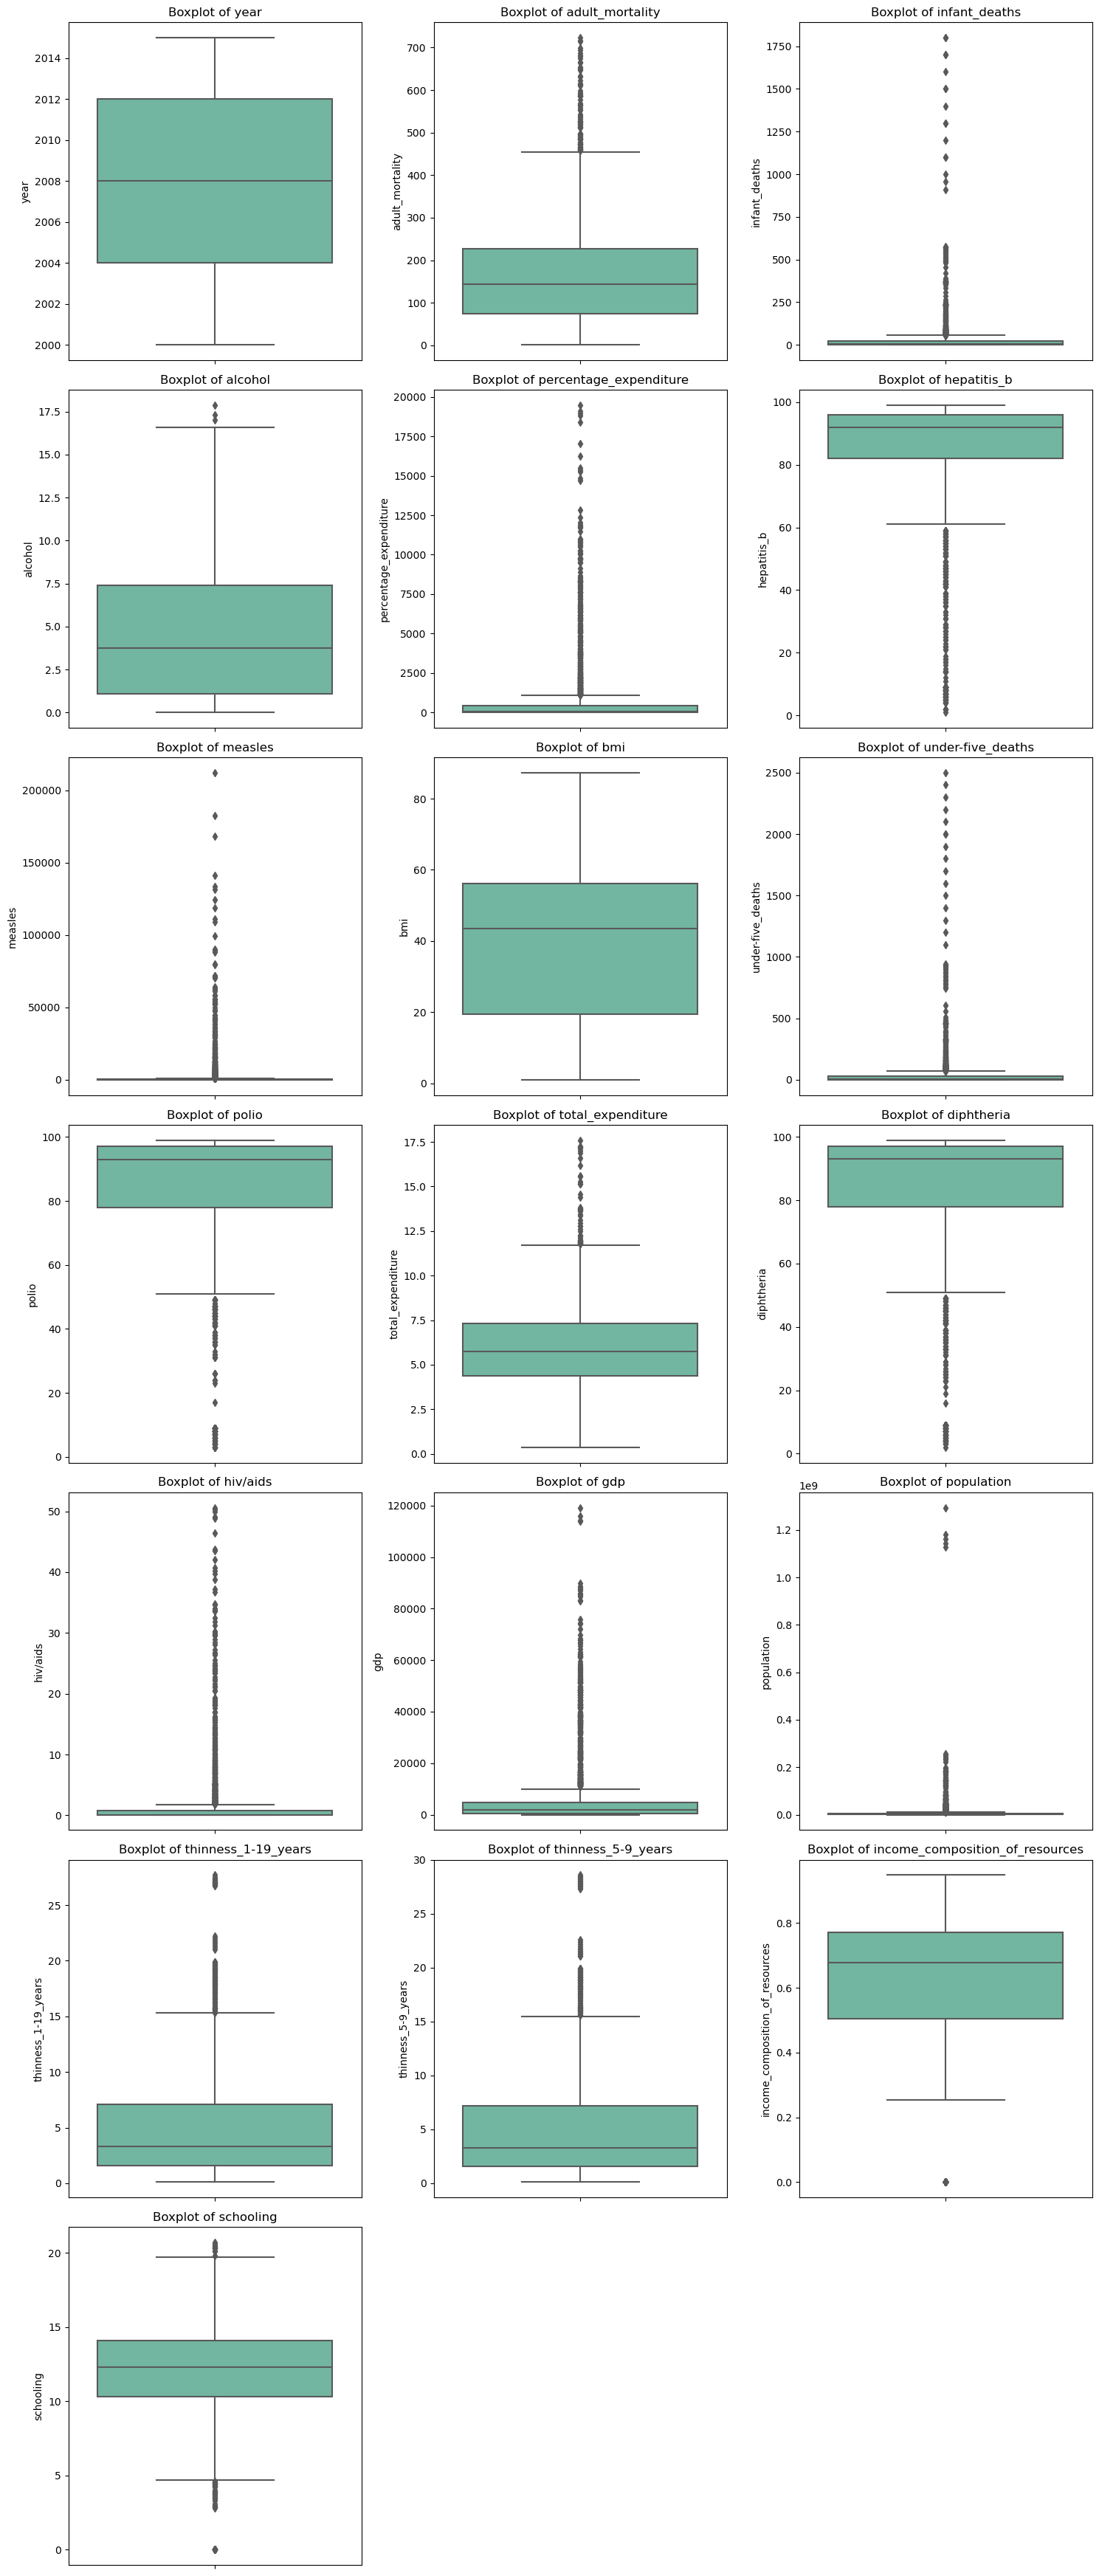

In [29]:

# Exclude 'life_expectancy' from the list
numeric_columns = [col for col in numeric_columns if col != 'life_expectancy']

# Determine grid layout
n = len(numeric_columns)
ncols = 3 # number of columns for the grid
nrows = int(n / ncols) + (n % ncols)  # determine the number of rows

# Create boxplots in a grid layout
plt.figure(figsize=(15, 5 * nrows))

for i, col in enumerate(numeric_columns):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(y=df[col], palette='Set2')

    # Customize the plot
    plt.ylabel(col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [35]:
#encoding the status feature
#encode status feature
label_encoder = LabelEncoder()

# Fit and transform the categorical feature
df['status_encoded'] = label_encoder.fit_transform(df['status'])

In [37]:
corr = df.drop(['country','status'],axis=1).corr()
corr

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,status_encoded
year,1.000000,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,...,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517,0.001864
life_expectancy,0.170819,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,-0.222738,...,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054,-0.481415
adult_mortality,-0.079535,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,...,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415,0.314894
infant_deaths,-0.037415,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,...,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951,0.112252
alcohol,-0.069147,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,-0.109790,...,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899,-0.579662
percentage_expenditure,0.031400,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.227408,-0.087852,...,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076,-0.454261
hepatitis_b,0.021302,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112441,-0.170549,...,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275,-0.127008
measles,-0.082493,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.176069,0.507809,...,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799,0.076955
bmi,0.108484,0.556901,-0.379092,-0.226796,0.313022,0.227408,0.112441,-0.176069,1.000000,-0.237048,...,0.230745,0.280267,-0.243383,0.273932,-0.069667,-0.532487,-0.539365,0.471947,0.499806,-0.309371
under-five_deaths,-0.042937,-0.222738,0.094280,0.996629,-0.109790,-0.087852,-0.170549,0.507809,-0.237048,1.000000,...,-0.127960,-0.195808,0.038062,-0.106093,0.539260,0.466697,0.471167,-0.159264,-0.206242,0.115195


<Axes: >

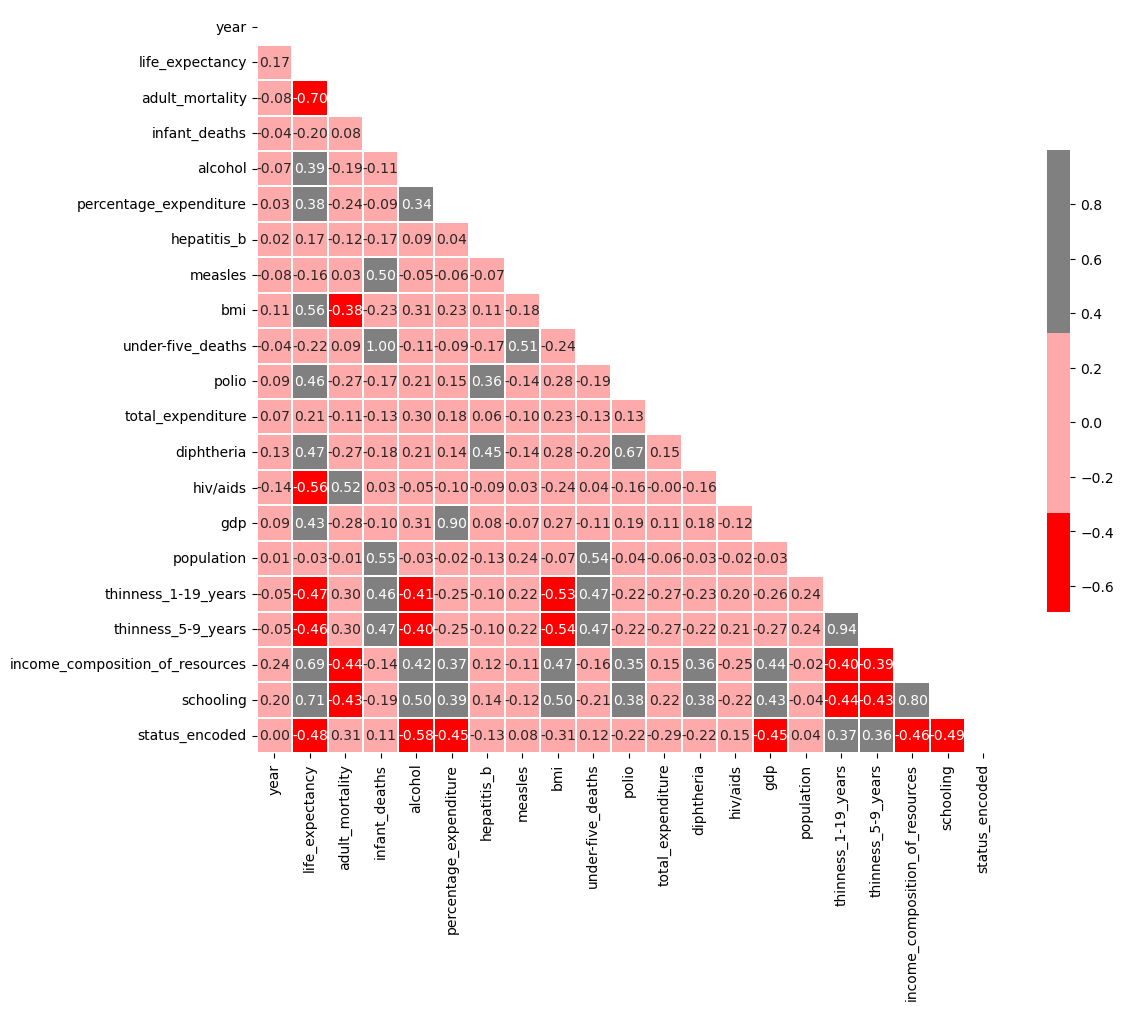

In [39]:
#correlation in form of heatmap
colors =  ['#FF0000', '#FFAAAA', '#808080']
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr,
            mask=mask,
            center=0,
            annot=True,
            fmt='.2f',
            cmap=colors,
            square=True,
            linewidths=.2,
            cbar_kws={"shrink": .6})

Here, we can see that the column "under-5 Deaths" and "Infant Death" has the correlation=1, so we remove one of them. This way we deal with Multicollinearity.

In [41]:
df.drop("under-five_deaths", axis=1, inplace=True)

In [49]:
df.drop('status',axis=1,inplace=True)
df.drop('country',axis=1,inplace=True)

In [50]:
X=df.drop('life_expectancy',axis=1)
Y=df['life_expectancy']

In [85]:
X_train1,X_test1,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [86]:
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on training data and transform
X_train = scaler.fit_transform(X_train1)
X_test  =  scaler.fit_transform(X_test1)

In [88]:
X_train.shape

(2350, 19)

In [89]:
models_parameters= {

       "LinearRegression":[LinearRegression(),  {'n_jobs':[-1]}],
       "RandomForestRegressor": [RandomForestRegressor(), {'n_estimators':[100], 'max_depth':[10], 'min_samples_split':[2], 'criterion':['squared_error']}],
       "DecisionTreeRegressor": [DecisionTreeRegressor(), {'splitter':['best'], 'max_depth':[12], 'min_samples_split':[2],'criterion':['squared_error']}],
       "GradientBoostingRegressor":[GradientBoostingRegressor(), {'n_estimators':[120], 'learning_rate':[0.1],'max_depth':[12], 'min_samples_leaf':[3],'loss':['squared_error']}],
       "XGBoostRegressor":[XGBRegressor(),{'nthread':[4], 'learning_rate': [.03, 0.05, .07], 'max_depth': [5, 6, 7],'min_child_weight': [4],'subsample': [0.7],'colsample_bytree': [0.7],'n_estimators': [500]}]
       
}

In [90]:
result={}

for key, value in models_parameters.items():
    result_list=[]
    regressor = GridSearchCV(value[0],value[1],cv=10, scoring="r2", n_jobs=-1).fit(X_train, Y_train)
    y_pred = regressor.predict(X_test)
    
    mse = mean_squared_error(Y_test, y_pred)
    root_mse=np.sqrt(mse)
    mae=mean_absolute_error(Y_test, y_pred)
    r2= r2_score(Y_test, y_pred)
    best_params = regressor.best_params_
    result_list.append(root_mse)
    result_list.append(mae)
    result_list.append(r2)
    result_list.append(best_params) 
    result[key]=result_list

In [92]:
final_results= pd.DataFrame(result)
final_results=final_results.T
columns=final_results.columns.tolist()
columns[0]="RootMeanSquaredError"
columns[1]="MeanAbsoluteError"
columns[2]="R2_Score"
columns[3]="best parameters"
final_results.columns=columns
final_results

,RootMeanSquaredError,MeanAbsoluteError,R2_Score,best parameters
LinearRegression,4.068727,2.962549,0.808988,{'n_jobs': -1}
RandomForestRegressor,1.967276,1.350843,0.955345,"{'criterion': 'squared_error', 'max_depth': 10..."
DecisionTreeRegressor,2.577295,1.698409,0.923357,"{'criterion': 'squared_error', 'max_depth': 12..."
GradientBoostingRegressor,2.050037,1.382891,0.951508,"{'learning_rate': 0.1, 'loss': 'squared_error'..."
XGBoostRegressor,1.800236,1.278362,0.962606,"{'colsample_bytree': 0.7, 'learning_rate': 0.0..."


In [93]:
final_results.iloc[4,3]


{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'subsample': 0.7}

Forward Feature selection in xgboost

In [94]:
reg=XGBRegressor(colsample_bytree=0.7,learning_rate=0.03,max_depth=7,min_child_weight=4,n_estimators=500,nthread=4,subsample=0.7)
sfs1 = sfs(reg,
           k_features=(1,19),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=9)

# Perform SFFS
sfs1 = sfs1.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   25.4s finished

[2023-09-15 12:27:03] Features: 1/19 -- score: 0.7822153642932599[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   25.6s finished

[2023-09-15 12:27:29] Features: 2/19 -- score: 0.8592055110981202[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   31.8s finished

[2023-09-15 12:28:01] Features: 3/19 -- score: 0.9488782371089063[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [95]:
best_features = list(sfs1.k_feature_names_)
print(best_features)

['0', '1', '2', '3', '8', '11', '14', '15', '16', '17', '18']


In [100]:
# Convert column indices from string to integers
best_feature_indices = [int(index) for index in best_features]

# Select only the columns corresponding to the best features
X_train_selected = X_train[:, best_feature_indices]
X_test_selected = X_test[:, best_feature_indices]

In [101]:
X_train_selected.shape
X_test_selected.shape

(588, 11)

In [102]:
reg=XGBRegressor(colsample_bytree=0.7,learning_rate=0.03,max_depth=7,min_child_weight=4,n_estimators=500,nthread=4,subsample=0.7)
reg.fit(X_train_selected,Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, nthread=4, num_parallel_tree=None,
             predictor=None, ...)

In [104]:
y_predict = reg.predict(X_test_selected)
mse = mean_squared_error(Y_test, y_predict)
root_mse=np.sqrt(mse)
mae=mean_absolute_error(Y_test, y_predict)
r2= r2_score(Y_test, y_predict)

In [107]:
print('r2 score,mae,rmse of XGBoostRegressor with forward feature selection',r2,mae,mse)

r2 score,mae,rmse of XGBoostRegressor with feature selection 0.9647826652598551 1.1352368568887516 3.052193614991385


Backward feature seelction in xgboost

In [108]:
reg=XGBRegressor(colsample_bytree=0.7,learning_rate=0.03,max_depth=7,min_child_weight=4,n_estimators=500,nthread=4,subsample=0.7)
sfs1 = sfs(reg,
           k_features=(1,19),
           forward=False,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=9)

# Perform SFFS
sfs1 = sfs1.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.1min finished

[2023-09-15 12:45:22] Features: 18/1 -- score: 0.965637216077587[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.0min finished

[2023-09-15 12:46:25] Features: 17/1 -- score: 0.966019452757999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   58.2s finished

[2023-09-15 12:47:23] Features: 16/1 -- score: 0.9660677257953036[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [109]:
best_features = list(sfs1.k_feature_names_)
print(best_features)

['0', '1', '2', '3', '8', '9', '11', '13', '14', '15', '16']


In [110]:
# Convert column indices from string to integers
best_feature_indices = [int(index) for index in best_features]

# Select only the columns corresponding to the best features
X_train_selected = X_train[:, best_feature_indices]
X_test_selected = X_test[:, best_feature_indices]

In [111]:
reg=XGBRegressor(colsample_bytree=0.7,learning_rate=0.03,max_depth=7,min_child_weight=4,n_estimators=500,nthread=4,subsample=0.7)
reg.fit(X_train_selected,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, nthread=4, num_parallel_tree=None,
             predictor=None, ...)

In [114]:
y_predict_b = reg.predict(X_test_selected)
mse_b = mean_squared_error(Y_test, y_predict_b)
root_mse_b=np.sqrt(mse_b)
mae=mean_absolute_error(Y_test, y_predict_b)
r2_b= r2_score(Y_test, y_predict_b)

In [ ]:
print('r2 score,mae,rmse of XGBoostRegressor with backward feature selection',r2,mae,mse)